In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = \
            reuters.load_data(num_words=10000)
            


2113536/2110848 [==============================] - 0s 0us/step


/home/ma/.bin/anaconda3/envs/tensor/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/ma/.bin/anaconda3/envs/tensor/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
word_index = reuters.get_word_index()


557056/550378 [==============================] - 0s 0us/step


In [3]:
reverse_word_index = \
    dict([(value, key) for (key, value) in word_index.items()])


In [4]:
decoded_newswire = ' ', ' '.join([reverse_word_index.get(i -3, '?') for i in test_data[0]])


In [5]:
decoded_newswire

(' ',
 '? the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to ? growth and expansion plans for ? inc and ? inc over the next two years a and p said the acquisition of ? in august 1986 and ? in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt ? ? of west germany reuter 3')

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, seq in enumerate(sequences):
        results[i,seq] = 1

    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)



In [7]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1

    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)



In [8]:
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])


In [9]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    batch_size=512, epochs=20, validation_data=(x_val, y_val))


Epoch 1/20
16/16 [==============================] - 0s 26ms/step - loss: 2.6337 - accuracy: 0.5469 - val_loss: 1.7663 - val_accuracy: 0.6420
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.4126 - accuracy: 0.7202 - val_loss: 1.3109 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.0339 - accuracy: 0.7859 - val_loss: 1.1275 - val_accuracy: 0.7620
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8031 - accuracy: 0.8317 - val_loss: 1.0398 - val_accuracy: 0.7840
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6356 - accuracy: 0.8682 - val_loss: 0.9624 - val_accuracy: 0.8030
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5075 - accuracy: 0.8904 - val_loss: 0.9396 - val_accuracy: 0.8110
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4110 - accuracy: 0.9141 - val_loss: 0.9363 - val_accuracy: 0.8080
Epoch 8/20
16

In [18]:
history.history

{'loss': [2.6752207279205322,
  1.4104574918746948,
  1.048532247543335,
  0.8316002488136292,
  0.6672399640083313,
  0.5348379015922546,
  0.4358136057853699,
  0.3457615077495575,
  0.28959283232688904,
  0.24163661897182465,
  0.21062065660953522,
  0.18337580561637878,
  0.1655293107032776,
  0.14839482307434082,
  0.1426907628774643,
  0.13223353028297424,
  0.12724700570106506,
  0.12196090817451477,
  0.11999538540840149,
  0.10664878785610199],
 'accuracy': [0.5249310731887817,
  0.7083437442779541,
  0.76847904920578,
  0.8213480114936829,
  0.8585567474365234,
  0.8912553191184998,
  0.9096717834472656,
  0.9284640550613403,
  0.936356782913208,
  0.9452518224716187,
  0.9483838677406311,
  0.9532698392868042,
  0.9538962841033936,
  0.9559007883071899,
  0.9552743434906006,
  0.9559007883071899,
  0.9555249214172363,
  0.9569030404090881,
  0.9571536183357239,
  0.9592834115028381],
 'val_loss': [1.7488564252853394,
  1.3018290996551514,
  1.1445037126541138,
  1.0466564893

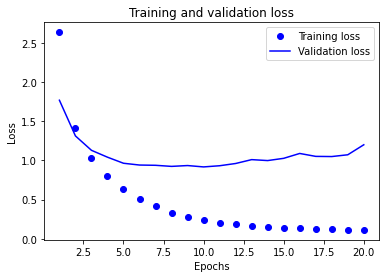

In [11]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.legend()


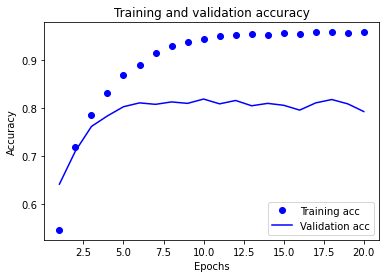

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()


In [17]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

model.fit(partial_x_train,
        partial_y_train,batch_size=512, epochs=8, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)


Epoch 1/8
16/16 [==============================] - 0s 19ms/step - loss: 2.7205 - accuracy: 0.4954 - val_loss: 1.8312 - val_accuracy: 0.6300
Epoch 2/8
16/16 [==============================] - 0s 14ms/step - loss: 1.4488 - accuracy: 0.6987 - val_loss: 1.3283 - val_accuracy: 0.7120
Epoch 3/8
16/16 [==============================] - 0s 14ms/step - loss: 1.0426 - accuracy: 0.7767 - val_loss: 1.1644 - val_accuracy: 0.7410
Epoch 4/8
16/16 [==============================] - 0s 14ms/step - loss: 0.8088 - accuracy: 0.8295 - val_loss: 1.0282 - val_accuracy: 0.7840
Epoch 5/8
16/16 [==============================] - 0s 16ms/step - loss: 0.6356 - accuracy: 0.8700 - val_loss: 0.9622 - val_accuracy: 0.8110
Epoch 6/8
16/16 [==============================] - 0s 16ms/step - loss: 0.5026 - accuracy: 0.8990 - val_loss: 0.9248 - val_accuracy: 0.8130
Epoch 7/8
16/16 [==============================] - 0s 15ms/step - loss: 0.4040 - accuracy: 0.9171 - val_loss: 0.8984 - val_accuracy: 0.8140
Epoch 8/8
71/71 [===

In [18]:
results

[0.9863650798797607, 0.7880676984786987]

In [20]:
x_test.shape

(2246, 10000)